In [4]:
# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

import math 

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Exercise 10.1

In this exercise the goal is the same as the ninth assignment, namely to solve the problem of the traveling salesman. In this case, however, we are using to find the best path the method of Simulated Annealing (SA). It consists in the following procedure:
1. start with only one individual
2. apply to this individual a mutation operator
3. accept the new individual via a Metropolis Algorithm with a Boltzmann-like probability of this kind: 
$$
p(x) = exp{-\left[(L^{1}_{new} - L^{1}_{old})/T\right]} 
$$
where T is a fictious temperature 
4. apply with the same method the other three mutation operators
5. repeat these points for $n$ steps
6. low the temperature and restart 

In order to apply a slow freezing of the system in the state with the lowest $L^{1}$ I chose the temperature at the step $i+1$ equal to $\alpha T_{i}$ where I set $\alpha = 0.9$. At the higher temperature it is easier for the system to sample many different configurations because of how it is written the probability through which a certain configuration is accepted or rejected (the system is more ergodic); insted at lower temperature it is hard for the system to change the configuration so I increased the number of reiteration $n$ of $150$ more steps as the temperature decreased. 

In the following plot we can see that under the temperature of $10^{-2}$ the value of $L^{1}$ has reached a stationary value in both cases (cities on the circumference and inside the square). 

The minimal value of $L^{1}$ reached by this algorithm in the case of the circumference is equal to the one found with the GA algorithm, while it is slighlty higher in the case of the square. Moreover, the SA algorithm need more steps to reach a good value, so it is computationally disfavoured with respect to GA. 

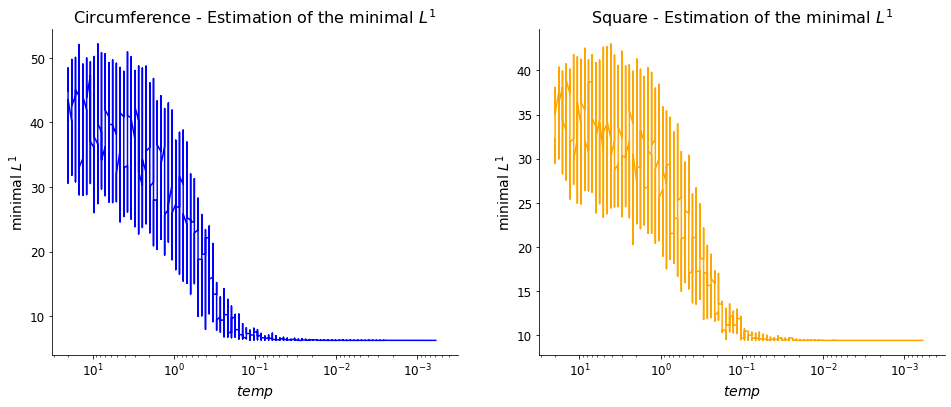

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

temp = np.zeros((2,752500))
f_best = np.zeros((2,752500))
shape = ['circ','quadr']
title = ['Circumference', 'Square']
color = ['blue', 'orange']


for i in range(2):
    temp[i,:], f_best[i,:]= np.loadtxt(f"L_{shape[i]}.out", usecols=(0,1), unpack='true')
    
for i in range(2):
    axx = ax[i]
    axx.plot(temp[i,:], f_best[i,:], color =color[i]);
    axx.set_xlabel(r"$temp$")
    axx.set_ylabel(r"minimal $L^1$")
    axx.set_xlim([10**(1.5),10**(-3.5)])
    axx.set_xscale('log')
    axx.set_title(f"{title[i]} - Estimation of the minimal $L^1$");

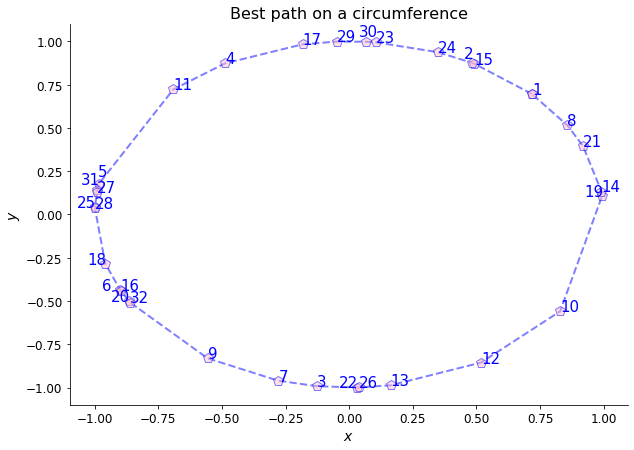

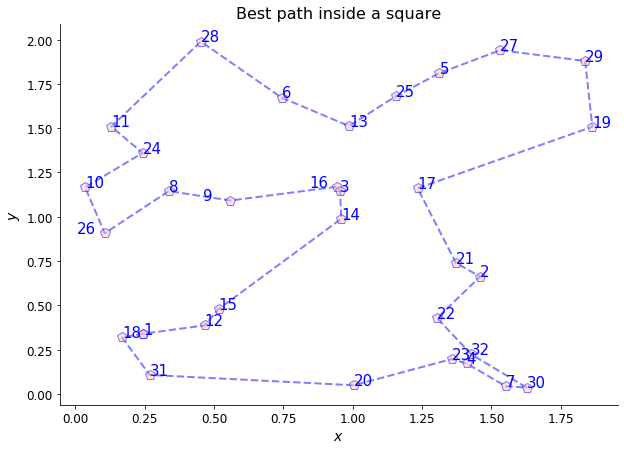

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
cities, x, y = np.loadtxt("bestpath_circ.out", usecols=(0,1,2), unpack='true')

ax.plot(x, y, '--p', MarkerSize = 10, markerfacecolor='pink', color="blue", alpha=0.5, lw=2);

for i in range(32):
    if(i==23 or i==15 or i==13 or i==10 or i==28 or i==18 or i==16): ax.text(x[i]-0.07,y[i], f'{int(cities[i])}', fontsize = 15,color ='b') 
    if(i==11): ax.text(x[i],y[i]+0.08, f'{int(cities[i])}', fontsize = 15,color ='b')
    if(i==5 or i==2): ax.text(x[i]-0.03,y[i]+0.03, f'{int(cities[i])}', fontsize = 15,color ='b')
    if(i!=23 and i!=15 and i!=13 and i!=10 and i!=28 and i!=18 and i!=16 and i!=11 and i!=5 and i!=2): ax.text(x[i],y[i], f'{int(cities[i])}', fontsize=15, color ='b')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.set_title(f"Best path on a circumference");

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
cities, x, y = np.loadtxt("bestpath_quadr.out", usecols=(0,1,2), unpack='true')

ax.plot(x, y, '--p', MarkerSize = 10, markerfacecolor='pink', color="blue", alpha=0.5, lw=2);

for i in range(32):
    if(i==24 or i==26 or i ==27): ax.text(x[i]-0.1,y[i], f'{int(cities[i])}', fontsize=15, color ='b')
    else: ax.text(x[i],y[i], f'{int(cities[i])}', fontsize=15, color ='b')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.set_title(f"Best path inside a square");


## Esercizio 10.2

The request in this exercise is to parallelize with MPI libraries the GA code in order to solve the the travelling salesman problem in the case of the cities inside a square by performing a *Genetic Search* with 4 parallel GA searches of the optimal path.
Each node performs an independent GA search and every $N_{migr} = 80$ generations the different nodes exchange their best individuals randomly.

The best path is the same as the one found with one processor in the $9$-th exercise but the result is reached sooner than the $1750$-th step as we can see from the plot of $L^{1}$. 

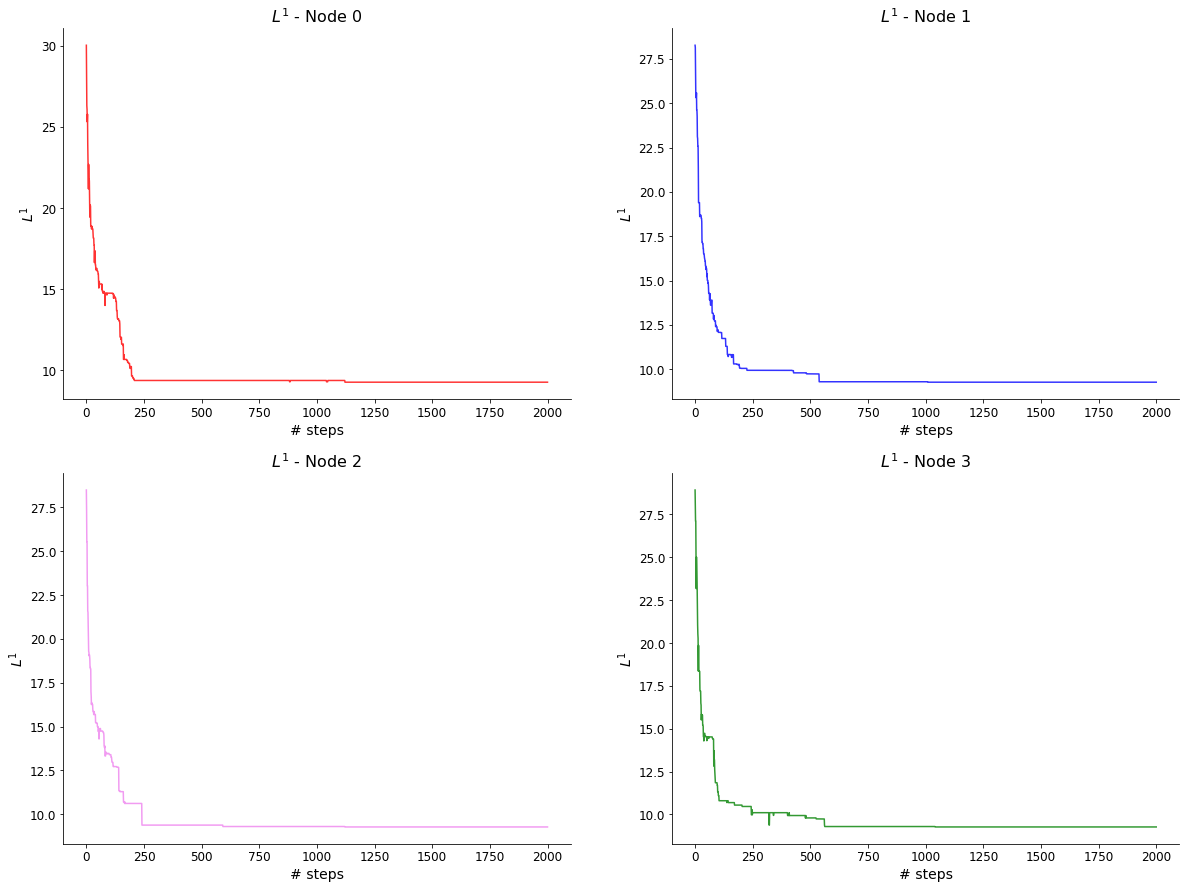

In [2]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
indice =0
colors = ['red','blue','violet','green']
x = np.linspace(0,2000,2000)

for k in range(2):
    for j in range(2):
        axx = ax[k,j]
        L = np.loadtxt(f"PT/bestL_quadr{indice}.out", usecols=(0), unpack='true')
        axx.plot(x, L, color = colors[indice], alpha=0.8);
        axx.set_xlabel(r"# steps")
        axx.set_ylabel(r"$L^{1}$")
        axx.set_title(r"$L^{1}$" f" - Node {indice}");
        indice = indice +1

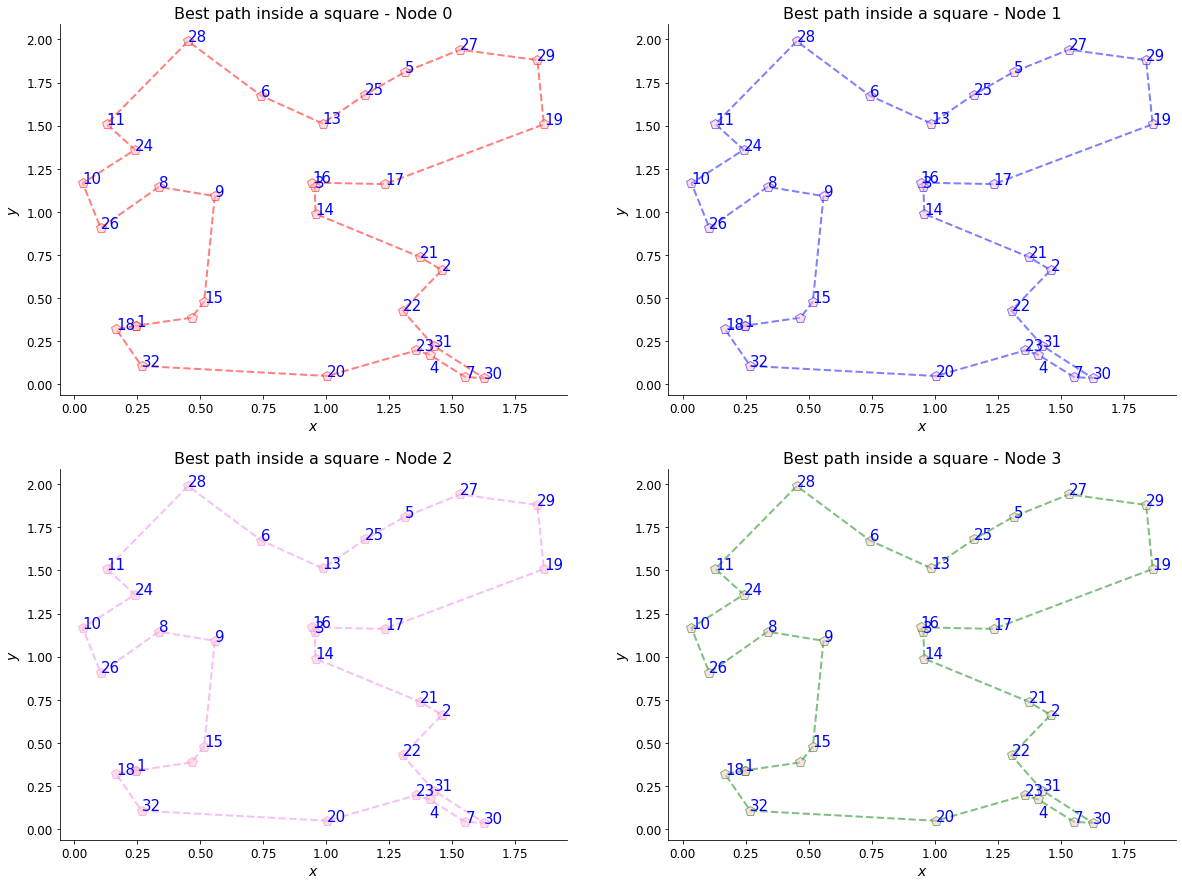

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
indice =0
colors = ['red','blue','violet','green']
for k in range(2):
    for j in range(2):
        axx = ax[k,j]
        cities, x, y = np.loadtxt(f"PT/bestpath_quadr{indice}.out", usecols=(0,1,2), unpack='true')
        axx.plot(x, y, '--p', MarkerSize = 10, markerfacecolor='pink', color = colors[indice], alpha=0.5, lw=2);
        for i in range(31):
            if(i==5): axx.text(x[i],y[i]-0.1, f'{int(cities[i])}', fontsize=15, color ='b')
            else: axx.text(x[i],y[i], f'{int(cities[i])}', fontsize=15, color ='b')
        axx.set_xlabel(r"$x$")
        axx.set_ylabel(r"$y$")
        axx.set_title(f"Best path inside a square - Node {indice}");
        indice = indice +1
